In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Dados

In [2]:
data = [
    [25, 30, 1, 0],
    [30, 50, 3, 1],
    [45, 80, 5, 1],
    [22, 20, 0, 0],
    [35, 60, 2, 1],
    [40, 70, 3, 1],
    [28, 40, 1, 0],
    [50, 90, 6, 1]
]
data = np.array(data)
data = pd.DataFrame(data, columns=['idade', 'renda (milhares)', 'numero de compras', 'compra'])

In [3]:
data.head()

,idade,renda (milhares),numero de compras,compra
0,25,30,1,0
1,30,50,3,1
2,45,80,5,1
3,22,20,0,0
4,35,60,2,1


# Separando Características e Alvo

In [4]:
X = data.drop('compra', axis=1).copy()
y = data['compra'].copy()

# Dividindo os dados em conjunto de treinamento e teste

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
X_train

,idade,renda (milhares),numero de compras
7,50,90,6
2,45,80,5
4,35,60,2
3,22,20,0
6,28,40,1


In [7]:
X_test

,idade,renda (milhares),numero de compras
1,30,50,3
5,40,70,3
0,25,30,1


# Ajustando o modelo

In [8]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Predições

In [9]:
y_pred = model.predict(X_test)

# Acurácia

In [10]:
accuracy = accuracy_score(y_test, y_pred)

In [11]:
print("Previsões:", y_pred)
print("Rótulos reais:", y_test.values)
print(f"Acurácia: {accuracy:.2f}")

Previsões: [0 1 0]
Rótulos reais: [1 1 0]
Acurácia: 0.67


# Plotando a árvore de decisão

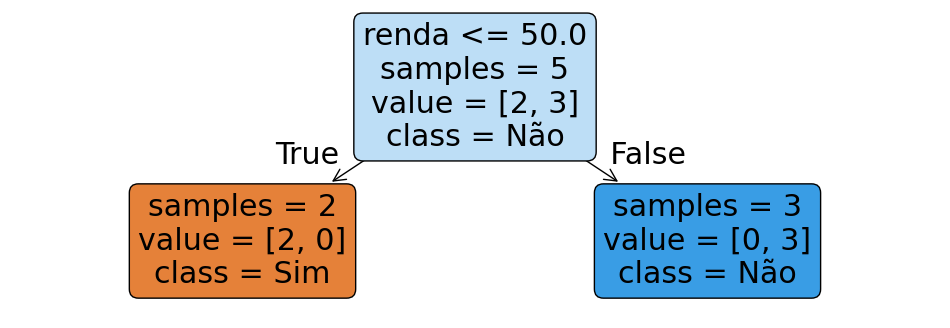

In [12]:
plt.figure(figsize=(12, 4))
plot_tree(model, filled=True, feature_names=['idade', 'renda', 'numero de compras anteriores'], class_names=['Sim', 'Não'], rounded=True, impurity=False)
plt.show()

In [13]:
model.feature_importances_

array([0., 1., 0.])

In [14]:
model.feature_names_in_

array(['idade', 'renda (milhares)', 'numero de compras'], dtype=object)